## Introduction

This notebook goes over some basics of scientific computing with Python. This is intended for people who have some familiarity with Python, but who are not completely familiar with some of the basic features of `numpy`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Render plots in cell output.
%matplotlib inline
# To make interactive plots, use %matplotlib notebook

## Arrays

Perhaps the most fundamental `numpy` object is the `ndarray`. This object provides a convenient interface for storing and operating on multi-dimensional data. `numpy` operations are extremely efficient and often allow one to avoid the use of loops, which tend to be rather slow in Python. This section goes over some of the basic ways to make arrays and do operations on arrays. As a basic example, we'll compare operations on `list`s with operations on `ndarray`s, from simple addition through matrix multiplication.

In [2]:
sample_vec = [1, 5, 17, 3]
sample_mat = [
    [5, 13, 1, 2],
    [0, 18, 3, 3],
    [9, 10, 1, 1],
    [3, 5, 7, 1],
]

# The simplest way to make an array
sample_vec_np = np.array(sample_vec)
sample_mat_np = np.array(sample_mat)

In [3]:
# Let's first compare addition of vectors
other_vec = [5, 6, 3, 1]
other_vec_np = np.array(other_vec)

# In order to do a vector sum on the list, we need to loop over the elements
vec_sum = []
for a, b in zip(sample_vec, other_vec):
    vec_sum.append(a+b)
    
# numpy arrays know how to do element-wise addition
vec_sum_np = sample_vec_np + other_vec_np
print(vec_sum)
print(vec_sum_np)

[6, 11, 20, 4]
[ 6 11 20  4]


The above example of vector addition should convince you that the syntax for working with `numpy` arrays is simpler than for `list`s. How does the computational time compare?

In [4]:
%%timeit
vec_sum = []
for a, b in zip(sample_vec, other_vec):
    vec_sum.append(a+b)

450 ns ± 19.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [5]:
%%timeit
vec_sum_np = sample_vec_np + other_vec_np

410 ns ± 6.21 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [6]:
# What about for bigger arrays?
big_arr_np = np.random.normal(size=10000)  # Make 10^4 draws from a standard normal distribution
big_arr = big_arr_np.tolist()  # Convert the numpy array to a list

In [7]:
%%timeit
vec_sum = []
for a, b in zip(big_arr, big_arr):
    vec_sum.append(a+b)

759 µs ± 43.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
%%timeit
vec_sum_np = big_arr_np + big_arr_np

3.12 µs ± 227 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


From these two tests, it should be clear that the improvement is small for small arrays, but simple operations like addition can end up being much more expensive using basic Python objects instead of `numpy` arrays&mdash;for a $10^4$ element array, `numpy` gives a factor of ~200-300 speedup. Let's now take a quick look at other operations supported by `numpy` and their equivalent pure-Python implementations.

In [9]:
# Scalar multiplication
scalar = 10
new_vec = []
for entry in sample_vec:
    new_vec.append(scalar * entry)
    
new_vec_np = scalar * sample_vec_np
print(new_vec)
print(new_vec_np)

[10, 50, 170, 30]
[ 10  50 170  30]


In [10]:
# Element-wise multiplication
vec_prod = []
for a, b in zip(sample_vec, other_vec):
    vec_prod.append(a*b)
    
vec_prod_np = sample_vec_np * other_vec_np
print(vec_prod)
print(vec_prod_np)

[5, 30, 51, 3]
[ 5 30 51  3]


In [11]:
# Inner-product
inner_prod = 0
for a, b in zip(sample_vec, other_vec):
    inner_prod += a * b
    
inner_prod_np = sample_vec_np @ other_vec_np
print(inner_prod, inner_prod_np)

89 89


### Matrix Operations

The last example comparing how one would calculate the inner product introduced the `@` operator. In pure-Python, this operator is typically used when "decorating" functions (or classes), but this is a fancy technique that I won't cover in this notebook. Instead, let's focus on its use in `numpy`: a shorthand for matrix multiplication. Now, one could also use the `np.dot` function for matrix multiplication, but using the `@` operator can be a bit neater. The subtleties of one are present in the other, so really the only time it's preferred to use `np.dot` is if you already have an array prepared for storing the output of the function call, since there are times when this has the edge performance-wise.  
<br><br>
Let's go over some of the uses with simple cases we can easily work out on paper. First, we'll work with the following matrix and vector:  
<br>
$$
    A = 
    \begin{pmatrix}
        1 & 3 & 5 \\
        0 & 2 & 4 \\
        0 & 0 & 6
    \end{pmatrix}, \qquad
    v =
    \begin{pmatrix}
        6 \\ 1 \\ 2
    \end{pmatrix}
$$
<br>
We'll start with the products $Av$ and $v^T A$, which you can easily show are
<br><br>
$$
    Av =
    \begin{pmatrix}
        19 \\ 10 \\ 12
    \end{pmatrix}, \qquad
    v^T A =
    \begin{pmatrix}
        6 & 20 & 46
    \end{pmatrix}
$$

In [12]:
A = [
    [1, 3, 5],
    [0, 2, 4],
    [0, 0, 6],
]
A_np = np.array(A, dtype=float)  # Cast the array elements to floating point numbers

v = [6, 1, 2]
v_np = np.array(v, dtype=float)

In [13]:
# First, pure-Python
Av = [0,] * len(v)
for i in range(len(A)):
    for j in range(len(v)):
        Av[i] += A[i][j] * v[j]
    
vTA = [0,] * len(v)
for i in range(len(A[0])):
    for j in range(len(v)):
        vTA[i] += v[j] * A[j][i]
print(Av)
print(vTA)

[19, 10, 12]
[6, 20, 46]


In [14]:
# Now, with numpy
Av_np = A_np @ v_np
vTA_np = v_np.T @ A_np

print(Av_np)
print(vTA_np)

[19. 10. 12.]
[ 6. 20. 46.]


Just like the example with addition, it should be clear that the `numpy` implementation is much cleaner than the pure-Python implementation. How about performance?

In [15]:
test_mat_np = np.random.normal(size=(1000,1000))
test_mat = test_mat_np.tolist()
test_vec_np = np.random.normal(size=1000)
test_vec = test_vec_np.tolist()

In [16]:
%%timeit
out = [0,] * len(test_vec)
for i in range(len(test_mat)):
    for j in range(len(test_vec)):
        out[i] += test_mat[i][j] * test_vec[j]

136 ms ± 6.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%%timeit
out = test_mat_np @ test_vec_np

319 µs ± 72.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Again, the `numpy` implementation is *much* faster than the pure-Python implementation. Hopefully this has been enough to convince you that you should **never** use pure-Python implementations of matrix operations&mdash;the `numpy` implementations are easier to code, cleaner, and faster. From here onward, we'll be working purely with `numpy` arrays, going over some of the basic functionality that you might find useful in your coding projects.

### Linear Algebra

`numpy` provides a package for typical linear algebra operations. These may be useful in your research or class assignments, so it's helpful to become familiar with these if you plan to continue using Python for scientific computing.

#### Eigenvalues and Eigenvectors

Let's go back to the matrix $A$ we defined earlier. You can do a bit of math to determine that $A$ has the following eigenvalue-eigenvector pairs:
<br><br>
$$
\begin{align}
    &\lambda_1 = 1, \quad &v_1 &= \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}, \\
    &\lambda_2 = 2, \quad &v_2 &= \frac{1}{\sqrt{10}}\begin{pmatrix} 3 \\ 1 \\ 0 \end{pmatrix}, \\
    &\lambda_3 = 6, \quad &v_3 &= \frac{1}{\sqrt{114}}\begin{pmatrix} 8 \\ 5 \\ 5 \end{pmatrix}.
\end{align}
$$
<br><br>
Let's check that the values calculated by `numpy` agree.

In [18]:
eigvals, eigvecs = np.linalg.eig(A_np)
expected_eigvals = [1, 2, 6]
expected_eigvecs = [
    np.array([1,0,0]),
    np.array([3,1,0]) / np.sqrt(10),
    np.array([8,5,5]) / np.sqrt(114),
]
for i in range(len(expected_eigvals)):
    eigvecs_match = np.allclose(eigvecs[:,i], expected_eigvecs[i])
    if eigvecs_match:
        print(f"Calculated eigenvalue: {eigvals[i]}; expectation matches calculation.")
    else:
        raise RuntimeError("Something went wrong!")

Calculated eigenvalue: 1.0; expectation matches calculation.
Calculated eigenvalue: 2.0; expectation matches calculation.
Calculated eigenvalue: 6.0; expectation matches calculation.


Note that when making the comparison, we extract the slice `[:,i]`. The eigenvectors output of `np.linalg.eig` are normalized and arranged so that the $i$-th column is the eigenvector corresponding to the $i$-th eigenvalue.

#### Cholesky Decomposition

Another useful linear algebra tool is the Cholesky decomposition of a matrix. For those who are unfamiliar, here's a quick definition:
<br><br>
Suppose there is some lower-triangular matrix $L$ such that $A = LL^T$. We call this the Cholesky factorization of $A$.
<br><br>
Working with the Cholesky factorization often has many advantages over working with the full representation of a matrix; however, not every matrix has a Cholesky decomposition. It turns out that only positive-definite matrices have a Cholesky factorization. It is worth noting that this fact, together with the computational complexity of calculating the Cholesky decomposition, makes Cholesky decomposition the fastest way to check whether a matrix is positive-definite.

In [19]:
# First, let's make a positive-definite matrix.
A = np.random.normal(size=(10,10))
A = A @ A.T

# Now take the Cholesky decomposition.
L = np.linalg.cholesky(A)

# Check that the factorization works.
np.allclose(A, L @ L.T)

True

So, what are some advantages to using the Cholesky decomposition? Here are a few off the top of my head:
* Roughly half of the entries are zero, so only using the lower-triangular portion can be a way to improve performance if you're careful.
* Calculating the determinant of the Cholesky decomposition is much more efficient than calculating the determinant of the full matrix.
    * If you're careful, using the Cholesky decomposition can provide a more numerically stable method of calculating the determinant.

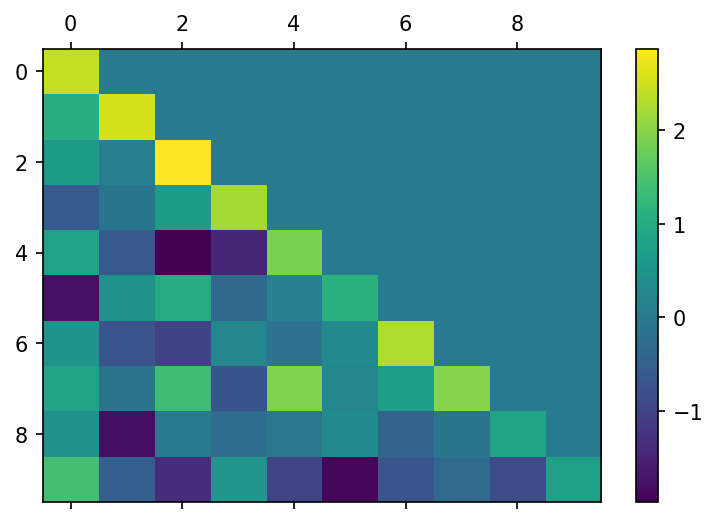

In [20]:
# First, here's how to extract just the lower-triangular part.
lower_tri = L[np.tril_indices_from(L)]

# Now, a quick visualization of the matrix.
fig, ax = plt.subplots(figsize=(6,4), dpi=150)
cax = ax.matshow(L, aspect='auto')
fig.colorbar(cax, ax=ax)

In [21]:
# Example of the determinant calculation.
direct_det = np.linalg.det(A)
chol_det = np.prod(np.diag(L)) ** 2
np.isclose(direct_det, chol_det)

True

#### Matrix Inversion

`numpy` also provides a function for calculating the inverse of a matrix: `np.linalg.inv`. This shows up frequently in e.g. maximum-likelihood fitting, so it's a helpful tool to be aware of. A word of caution: matrix inversion isn't always numerically stable. If you're in the business of inverting matrices numerically, then you'll want to think about whether your matrix is "poorly conditioned". For reference, the "condition number" of a matrix can be estimated by taking the ratio of the largest eigenvalue to the smallest eigenvalue&mdash;if this number is large, then your matrix is poorly conditioned and numerical inversion will be unstable. The next few cells demonstrate this.

In [22]:
# First, let's just look at taking an inverse and verifying it works.
Ainv = np.linalg.inv(A)
np.allclose(A @ Ainv, np.eye(A.shape[0]))

True

In [23]:
# Now let's make a poorly conditioned matrix.
input_vec = np.linspace(1, 100, 20)
test_mat = np.vander(input_vec).T  # A big enough Vandermonde matrix should be ill-conditioned

# Check that the test matrix actually is ill-conditioned.
eigvals = np.linalg.eigvals(test_mat)
condition_num = np.abs(eigvals).max() / np.abs(eigvals).min()
print(f"The condition number of the test matrix is roughly {condition_num:.2e}.")

The condition number of the test matrix is roughly 2.41e+19.


In [24]:
# Numerically invert the matrix.
test_mat_inv = np.linalg.inv(test_mat)

# Now check the accuracy of the inversion.
np.allclose(test_mat_inv @ test_mat, np.eye(test_mat.shape[0]))

False

#### Solving Linear Systems of Equations

`numpy` can also be used to solve linear systems of equations. Let's work through an example. Consider the following system of equations:
<br><br>
$$
\begin{align}
    x + y + z &= 5 \\
    3x - 2y + z &= 2 \\
    4x + y - 5z &= 1
\end{align}
$$
After a bit of math, you can show that the intersection of these three planes occurs at $(x,y,z) = (\frac{60}{39}, \frac{79}{39}, \frac{56}{39})$. Let's verify this numerically. First, note that we can write this as the following linear equation: $A\vec{x} = \vec{y}$, with $A$ containing the coefficients in the system of equations, $\vec{x} = (x, y, z)$, and $\vec{y} = (5, 2, 1)$. Since $A$ is a square matrix, we could directly solve this by inverting $A$, or we could let `numpy` handle the work of solving the system of equations. Let's see both in action.

In [25]:
A = np.array(
    [
        [1, 1, 1],
        [3, -2, 1],
        [4, 1, -5],
    ], dtype=float
)
y = np.array([5, 2, 1], dtype=float)
expected_sol = np.array([60, 79, 56], dtype=float) / 39
direct_sol = np.linalg.inv(A) @ y
implicit_sol = np.linalg.solve(A, y)

# Check that all the solutions agree.
direct_match = np.allclose(expected_sol, direct_sol)
implicit_match = np.allclose(expected_sol, implicit_sol)
print(f"Direct result from inversion matches: {direct_match}")
print(f"Result from np.linalg.solve matches: {implicit_match}")

Direct result from inversion matches: True
Result from np.linalg.solve matches: True


So, rather than inverting the matrix directly, we can let `numpy` solve the system of equations for us. There are some restrictions on what the `np.linalg.solve` function can work with, so make sure to read the documentation to see if it works for your use-case. A word of caution before moving on: in the previous example, we saw how matrix inversion can be numerically unstable for poorly-conditioned matrices. Due to this, it is often better to use `np.linalg.solve` if it is appropriate for your problem, as this routine tends to be more stable than directly solving through matrix inversion.

#### Summary

This section covered some of the basic linear algebra tools provided by `numpy` that may be useful in your assignments and/or research, but this is by no means an exhaustive review. There is a huge selection of tools out there for you to use, and it is worthwhile to spend some time experimenting with what's provided, when it works well, and when it doesn't.

### Example

Since you have lecture notes on numerical methods, I'd like to have this notebook end with an example. Since it's relevant, let's work through a basic part of the vortex problem: calculating the velocity field due to a single vortex. Since you can use superposition to construct the velocity field due to many vortices, this should be enough for you to figure out how to do the rest of the problem (and you can also find my solutions in the `pset2` directory of the repo this notebook is hosted on).
<br><br>
First, recall that a line vortex at the origin, oriented along the $z$-axis, generates an azimuthally-symmetric, sheared flow:
<br><br>
$$
    \vec{u}(\vec{r}) = \frac{k}{r} \hat{\phi}.
$$
<br>
We can figure out what this is in Cartesian coordinates by noting that $\hat{\phi} = \hat{z} \times \hat{r}$ and
<br><br>
$$
    \hat{r} = \frac{\vec{r}}{r} = \frac{x}{r}\hat{x} + \frac{y}{r}\hat{y}.
$$
<br>
Since $\hat{z} \times \hat{x} = \hat{y}$ and $\hat{z} \times \hat{y} = -\hat{x}$, we ultimately have
<br><br>
$$
    \hat{\phi} = -\frac{y}{r}\hat{x} + \frac{x}{r}\hat{y},
$$
<br>
and so a line vortex in Cartesian coordinates can be written as
<br><br>
$$
    \vec{u} = -\frac{ky}{r^2}\hat{x} + \frac{kx}{r^2}\hat{y}.
$$
<br>
Now, if we instead place the vortex at position $\vec{r}_0 = (x_0, y_0)$, the velocity field is calculated via
<br><br>
$$
    \vec{u}(\vec{r}) = -\frac{k(y-y_0)}{|\vec{r} - \vec{r}_0|^2}\hat{x} + \frac{k(x-x_0)}{|\vec{r} - \vec{r}_0|^2}\hat{y}.
$$
<br>
Let's start by calculating the flow for a single line vortex at position $\vec{r}_0$.

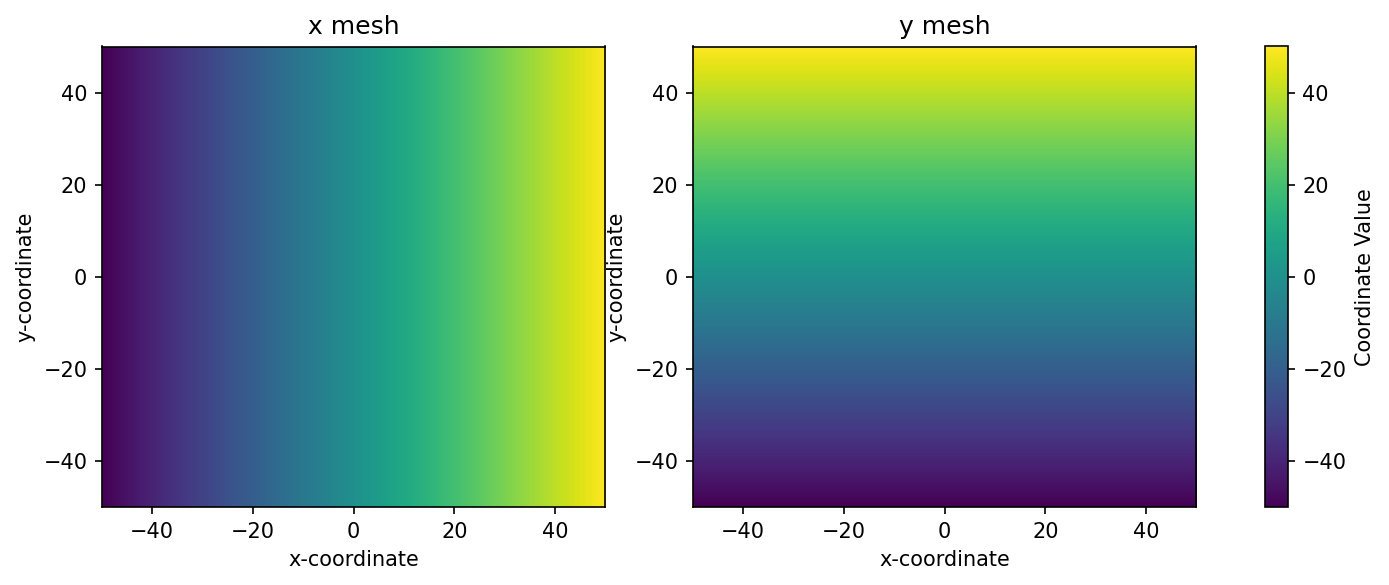

In [26]:
# First, we need to make a mesh to calculate the velocity field on.
# For simplicity, we'll use a uniform square mesh.
mesh_base = np.linspace(-50, 50, 500)
x_mesh, y_mesh = np.meshgrid(mesh_base, mesh_base, indexing="xy")

# Let's take a quick look at how the mesh is structured.
extent = (mesh_base[0], mesh_base[-1], mesh_base[0], mesh_base[-1])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4), dpi=150, facecolor='w')
for ax, mesh in zip(axes, (x_mesh, y_mesh)):
    cax = ax.imshow(mesh, aspect="auto", extent=extent, origin="lower")
    ax.set_xlabel("x-coordinate")
    ax.set_ylabel("y-coordinate")

axes[0].set_title("x mesh")
axes[1].set_title("y mesh")
fig.tight_layout()
cbar = fig.colorbar(cax, ax=axes)
cbar.set_label("Coordinate Value")

As you can see in the above figure, each row of the `x_mesh` ranges over the $x$ values for our coordinate grid, while each column of the `y_mesh` ranges over the $y$ values for our coordinate grid. If you're using `np.meshgrid` to make a mesh, then you need to be careful about how you set the `indexing` parameter, since the two options (`'ij'` and `'xy'`) have different behavior. If you're ever unsure of whether your mesh has been constructed correctly, then it can be helpful to make simple plots like the above figure as a sanity check.

In [27]:
# Now let's choose a location for the vortex.
vortex_position = np.array([23.5, -5])

# Let's have our vortex produce a flow with clockwise circulation.
k = -5.0

# Now let's calculate the velocity field.
x_rel = x_mesh - vortex_position[0]
y_rel = y_mesh - vortex_position[1]
sq_dist = x_rel**2 + y_rel**2
x_velocity = -y_rel * k / sq_dist
y_velocity = x_rel * k / sq_dist

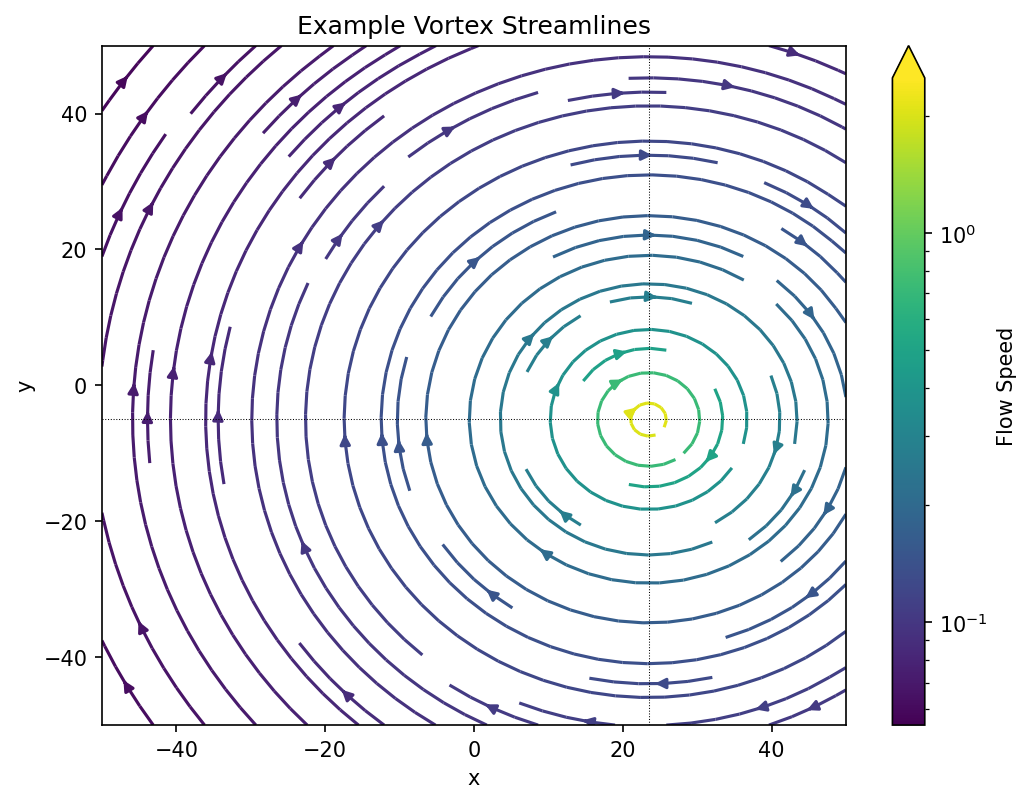

In [28]:
# Now our sanity check: do the streamlines look correct?
# First, let's set up some plotting parameters to help with visualization.
flow_speed = np.sqrt(x_velocity**2 + y_velocity**2)
mask_radius = 2
mask = sq_dist <= mask_radius**2
cmap = plt.cm.viridis
norm = plt.cm.colors.LogNorm(  # Use a base-10 log scale
    vmin=flow_speed.min(),  # with the minimum flow speed as the lower bound
    vmax=flow_speed[~mask].max(),  # and the unmasked maximum flow speed as the upper bound
)
smap = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Now, let's set up the figure and actually make the streamplot
fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi=150, facecolor='w')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Example Vortex Streamlines")
ax.axhline(vortex_position[1], color='k', ls=':', lw=0.5)
ax.axvline(vortex_position[0], color='k', ls=':', lw=0.5)
ax.streamplot(
    x_mesh, y_mesh, x_velocity, y_velocity, color=flow_speed, cmap=cmap, norm=norm
)
cbar = fig.colorbar(smap, ax=ax, extend="max")
cbar.set_label("Flow Speed");

The above figure serves as our sanity check for ensuring that we did everything correctly. The flow is pure $\hat{\phi}$-oriented with a shear in the $\hat{r}$-direction and the maximum value at the center of the vortex. Rather than a sanity check, one can think of this as something of a unit test&mdash;we wrote code thinking that it should do something, and this is a test to show that it does what we expect it to do.

This about wraps up the tutorial. This certainly doesn't cover all of the features provided by `numpy`, but it provides a simple introduction to some of the tools that are commonplace in scientific computing with Python. If there is any part of this tutorial that you find confusing, then it is worthwhile to take the time to change parameter values, mess around with things, and see what happens. One of the best ways to become a better coder is to make as many mistakes as you can and take the time to understand the mistakes so that you don't make them again (and also so you can figure out what's wrong if you're working with someone else's code and it's not working).